# Autoencoder for MNIST

In [1]:
import pandas as pd
import numpy as np
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
from keras import regularizers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

# read data
x_train = pd.read_csv('./dataset/mnist_train.csv').values
x_test = pd.read_csv('./dataset/mnist_test.csv').values

label_train = pd.read_csv('./dataset/mnist_train_lables.csv').values
label = []
for i in range(len(label_train)):
    label.append(label_train[i][0])
y_train = np.asarray(label)

label_test = pd.read_csv('./dataset/mnist_test_lables.csv').values
label2 = []
for i in range(len(label_test)):
    label2.append(label_test[i][0])
y_test = np.asarray(label2)

Using TensorFlow backend.


In [2]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [3]:
x_train.shape

(10000, 784)

In [4]:
x_test.shape

(2000, 784)

# Basic Autoencoder

In [365]:
######### basic autoencoder #############
encoding_dim = 64

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

# implement AE
autoencoder = Model(input_img, decoded)  
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [366]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_59 (Dense)             (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [340]:
ae_train = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ).history

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 345us/step - loss: 0.4890 - val_loss: 0.2949
Epoch 2/100
10000/10000 [==============================] - 1s 78us/step - loss: 0.2832 - val_loss: 0.2718
Epoch 3/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2731 - val_loss: 0.2657
Epoch 4/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2667 - val_loss: 0.2593
Epoch 5/100
10000/10000 [==============================] - 1s 83us/step - loss: 0.2592 - val_loss: 0.2523
Epoch 6/100
10000/10000 [==============================] - 1s 78us/step - loss: 0.2501 - val_loss: 0.2421
Epoch 7/100
10000/10000 [==============================] - 1s 84us/step - loss: 0.2404 - val_loss: 0.2340
Epoch 8/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2312 - val_loss: 0.2257
Epoch 9/100
10000/10000 [==============================] - 1s 111us/step - loss: 0.2232 - val_loss: 0.

Epoch 77/100
10000/10000 [==============================] - 1s 88us/step - loss: 0.1129 - val_loss: 0.1153
Epoch 78/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.1123 - val_loss: 0.1145
Epoch 79/100
10000/10000 [==============================] - 1s 80us/step - loss: 0.1118 - val_loss: 0.1142
Epoch 80/100
10000/10000 [==============================] - 1s 81us/step - loss: 0.1113 - val_loss: 0.1134
Epoch 81/100
10000/10000 [==============================] - 1s 79us/step - loss: 0.1108 - val_loss: 0.1131
Epoch 82/100
10000/10000 [==============================] - 1s 77us/step - loss: 0.1103 - val_loss: 0.1123
Epoch 83/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.1098 - val_loss: 0.1118
Epoch 84/100
10000/10000 [==============================] - 1s 84us/step - loss: 0.1093 - val_loss: 0.1117
Epoch 85/100
10000/10000 [==============================] - 1s 86us/step - loss: 0.1089 - val_loss: 0.1108
Epoch 86/100
10000/10000 [===========

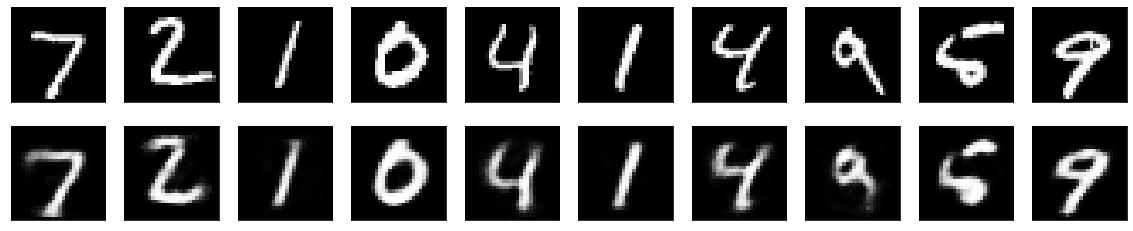

In [341]:
### show image ###

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
#decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

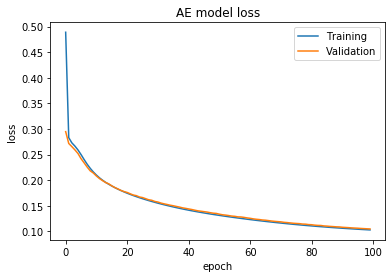

In [342]:
# AE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [343]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,100.000000
mean,0.149032
std,0.054669
min,0.102997
25%,0.113856
50%,0.131832
75%,0.164449
max,0.489009


In [344]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,100.000000
mean,0.148176
std,0.042859
min,0.104938
25%,0.115928
50%,0.134478
75%,0.166452
max,0.294890


In [345]:
encoded_imgs.mean()

4.061378

In [346]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='./MNIST_AE_encoded.csv',index= False)

# Sparse Autoencoder

In [347]:
######## sparse autoencoder#######


encoding_dim = 64

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-7))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

ae_train = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ).history

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 337us/step - loss: 0.4940 - val_loss: 0.3064
Epoch 2/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2960 - val_loss: 0.2852
Epoch 3/100
10000/10000 [==============================] - 1s 86us/step - loss: 0.2863 - val_loss: 0.2784
Epoch 4/100
10000/10000 [==============================] - 1s 84us/step - loss: 0.2800 - val_loss: 0.2719
Epoch 5/100
10000/10000 [==============================] - 1s 103us/step - loss: 0.2731 - val_loss: 0.2657
Epoch 6/100
10000/10000 [==============================] - 1s 83us/step - loss: 0.2653 - val_loss: 0.2580
Epoch 7/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2571 - val_loss: 0.2502
Epoch 8/100
10000/10000 [==============================] - 1s 82us/step - loss: 0.2492 - val_loss: 0.2434
Epoch 9/100
10000/10000 [==============================] - 1s 87us/step - loss: 0.2418 - val_loss: 0.

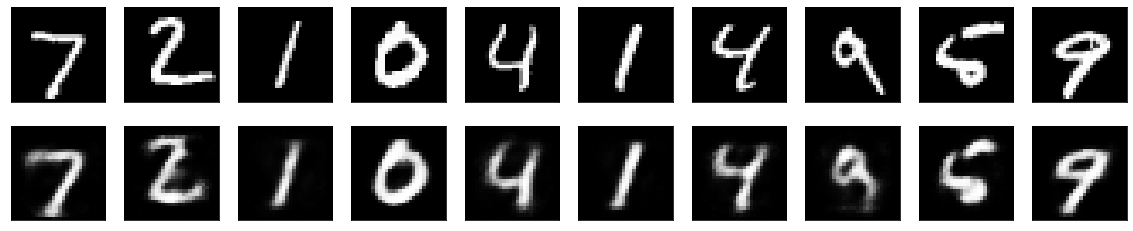

In [348]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

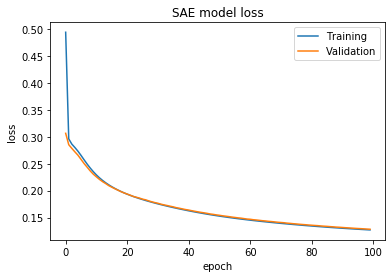

In [349]:
# SAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('SAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [350]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,100.000000
mean,0.169969
std,0.051762
min,0.127065
25%,0.137044
50%,0.153157
75%,0.183876
max,0.493965


In [351]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,100.000000
mean,0.168358
std,0.040242
min,0.128354
25%,0.138497
50%,0.154601
75%,0.184678
max,0.306387


In [352]:
encoded_imgs.mean()

1.5670488

In [353]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='./MNIST_SAE_encoded.csv',index= False)

# Contractive Autoencoder

In [354]:
########### Constractive Autoencoder ############
encoding_dim = 64

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu', name = 'encoded')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

lam = 10e-6

def contractive_loss(y_pred, y_true):
    
        mse = K.mean(K.square(y_true - y_pred), axis=1)
        W = K.variable(value=autoencoder.get_layer('encoded').get_weights()[0])
        W = K.transpose(W)
        h = autoencoder.get_layer('encoded').output
        dh = h * (1 - h)
        contractive = lam * K.sum(dh**2 * K.sum(W**2, axis=1), axis=1)

        return mse + contractive
    
autoencoder.compile(optimizer='adam', loss= contractive_loss)
ae_train = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test)
                ).history

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 3s 322us/step - loss: 0.1025 - val_loss: 0.0614
Epoch 2/100
10000/10000 [==============================] - 1s 71us/step - loss: 0.0536 - val_loss: 0.0465
Epoch 3/100
10000/10000 [==============================] - 1s 61us/step - loss: 0.0427 - val_loss: 0.0391
Epoch 4/100
10000/10000 [==============================] - 1s 68us/step - loss: 0.0360 - val_loss: 0.0341
Epoch 5/100
10000/10000 [==============================] - 1s 63us/step - loss: 0.0315 - val_loss: 0.0304
Epoch 6/100
10000/10000 [==============================] - 1s 72us/step - loss: 0.0283 - val_loss: 0.0278
Epoch 7/100
10000/10000 [==============================] - 1s 65us/step - loss: 0.0258 - val_loss: 0.0254
Epoch 8/100
10000/10000 [==============================] - 1s 63us/step - loss: 0.0236 - val_loss: 0.0234
Epoch 9/100
10000/10000 [==============================] - 1s 80us/step - loss: 0.0217 - val_loss: 0.0

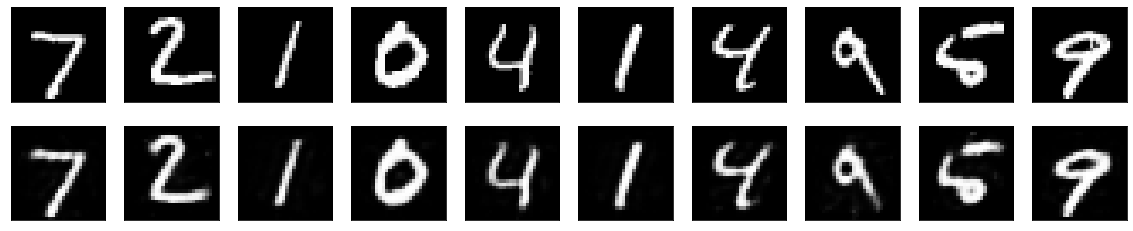

In [355]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

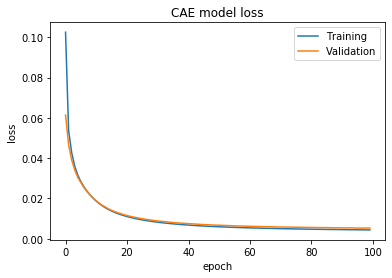

In [356]:
# CAE loss
plt.plot(ae_train['loss'])
plt.plot(ae_train['val_loss'])
plt.title('CAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [357]:
loss = pd.DataFrame(ae_train['loss'])
loss.describe()

,0
count,100.000000
mean,0.010169
std,0.012464
min,0.004417
25%,0.004921
50%,0.006004
75%,0.009450
max,0.102453


In [358]:
val_loss = pd.DataFrame(ae_train['val_loss'])
val_loss.describe()

,0
count,100.000000
mean,0.010257
std,0.009023
min,0.005324
25%,0.005763
50%,0.006765
75%,0.010025
max,0.061370


In [359]:
encoded_imgs.mean()

0.8655478

In [360]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_data = pd.DataFrame(encoded_som)
encoded_data.to_csv(path_or_buf='./MNIST_CAE_encoded.csv',index= False)

# Convolutional Autoencoder

In [204]:
######## Convolutional Autoencoder ########

x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(2000,28,28,1)

In [205]:
x_train[1].shape

(28, 28, 1)

In [206]:
# plt.imshow(x_test[2])

In [331]:
#encoding_dim = 32

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
x = input_img
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
shape = K.int_shape(x)
encoded = Flatten()(x)
#encoded = Dense(32, activation='relu', name = 'encoded')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional
#latent_inputs = Input(shape=(encoding_dim,), name='decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(encoded)
x = Reshape((shape[1], shape[2], shape[3]))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [332]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_311 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_312 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 7, 7, 4)           1156      
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 4, 4, 4)           0         
__________

In [273]:
history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.3308 - val_loss: 0.2378
Epoch 2/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.2230 - val_loss: 0.2008
Epoch 3/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1904 - val_loss: 0.1773
Epoch 4/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1700 - val_loss: 0.1617
Epoch 5/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1572 - val_loss: 0.1526
Epoch 6/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1487 - val_loss: 0.1445
Epoch 7/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1421 - val_loss: 0.1410
Epoch 8/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1370 - val_loss: 0.1362
Epoch 9/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1327 - val_loss: 0.13

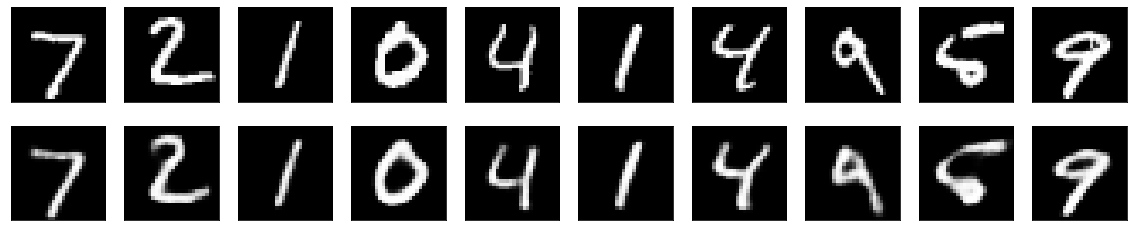

In [274]:

### show image ###

encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1) 
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


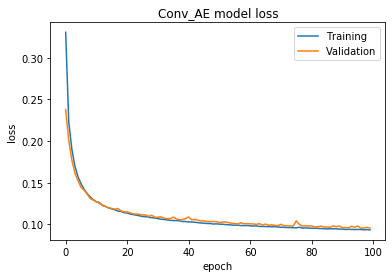

In [368]:
# Convolutional AE loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Conv_AE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [276]:
loss = pd.DataFrame(history.history['loss'])
loss.describe()

,0
count,100.000000
mean,0.109346
std,0.030118
min,0.093232
25%,0.096028
50%,0.100228
75%,0.109600
max,0.330818


In [277]:
val_loss = pd.DataFrame(history.history['val_loss'])
val_loss.describe()

,0
count,100.000000
mean,0.109868
std,0.021436
min,0.095289
25%,0.098243
50%,0.103175
75%,0.111479
max,0.237764


In [278]:
encoded_imgs.mean()

4.514806

In [279]:
#encoded_imgs = encoded_imgs.reshape(2000,-1)

In [280]:
encoded_imgs.shape

(2000, 64)

In [281]:
nonzero = list(map(lambda i: any(encoded_imgs[:,i] != 0), range(encoded_imgs.shape[1])))

encoded_som_nonzero = pd.DataFrame(encoded_imgs[:,nonzero])

encoded_som_nonzero.tail()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1995,3.520612,2.340897,1.469042,4.995486,6.381257,8.912045,2.586669,5.672861,6.132160,9.212537,...,6.012298,4.632037,1.358779,5.342917,6.725205,0.657598,0.085566,2.073307,4.087287,2.451829
1996,5.468910,4.288513,1.124006,4.222316,6.643150,7.715651,2.785415,3.256797,6.522395,7.244547,...,5.639756,4.059615,1.475963,5.065706,6.300220,0.391870,0.221778,2.313065,4.398621,2.185952
1997,5.151926,4.366132,1.300846,5.739872,6.926198,8.394717,3.693449,5.505511,5.744446,7.808869,...,5.882197,5.525348,0.921444,5.302089,7.322626,0.724607,0.012126,2.760512,5.300605,2.093822
1998,4.559982,6.112866,1.166373,6.008165,5.028864,9.674006,5.810138,3.257816,5.106835,8.760432,...,9.184234,6.095936,0.168506,4.927804,9.829006,3.017139,0.000000,2.525286,5.406596,3.234189
1999,4.485513,3.544092,0.943778,5.493869,6.598835,8.493495,4.853252,6.313672,5.704623,8.818089,...,7.744085,6.619004,0.590328,6.449778,8.577196,1.135780,0.000000,1.623703,3.485380,2.759909


In [287]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

## output data
encoded_som_nonzero.to_csv(path_or_buf='./MNIST_ConAE_encoded.csv',index= False)

# Denoising Autoencoder

In [40]:
########## Denoising Autoencoder ###########

In [288]:
x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(2000,28,28,1)

# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

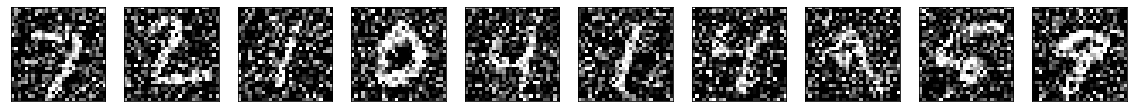

In [289]:
# noisy image
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [317]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = input_img
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

#encoded = MaxPooling2D((2, 2), padding='same')(x)
shape = K.int_shape(x)
encoded = Flatten()(x)
#encoded = Dense(128, activation='relu', name = 'encoded')(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Dense(shape[1] * shape[2] * shape[3])(encoded)
x = Reshape((shape[1], shape[2], shape[3]))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [318]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_304 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 7, 7, 4)           1156      
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 4, 4, 4)           0         
__________

In [319]:
ae_train = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                )

Train on 10000 samples, validate on 2000 samples
Epoch 1/100
10000/10000 [==============================] - 20s 2ms/step - loss: 0.3285 - val_loss: 0.2589
Epoch 2/100
10000/10000 [==============================] - 21s 2ms/step - loss: 0.2569 - val_loss: 0.2307
Epoch 3/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.2179 - val_loss: 0.2067
Epoch 4/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1996 - val_loss: 0.1912
Epoch 5/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1859 - val_loss: 0.1794
Epoch 6/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1771 - val_loss: 0.1744
Epoch 7/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1711 - val_loss: 0.1677
Epoch 8/100
10000/10000 [==============================] - 17s 2ms/step - loss: 0.1666 - val_loss: 0.1637
Epoch 9/100
10000/10000 [==============================] - 18s 2ms/step - loss: 0.1626 - val_loss: 0.16

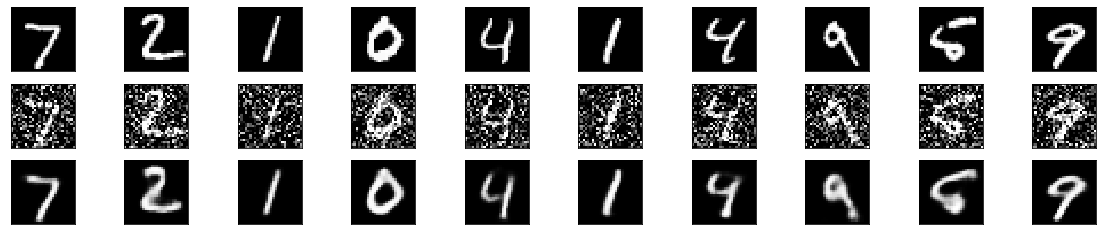

In [320]:

### show image ###

encoded_imgs = encoder.predict(x_test_noisy)
#decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display noisy 
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i +2*n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

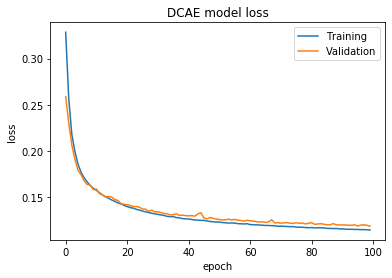

In [321]:
# DCAE loss
plt.plot(ae_train.history['loss'])
plt.plot(ae_train.history['val_loss'])
plt.title('DCAE model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [322]:
loss = pd.DataFrame(ae_train.history['loss'])
loss.describe()

,0
count,100.000000
mean,0.133167
std,0.029980
min,0.114653
25%,0.118019
50%,0.123165
75%,0.135319
max,0.328507


In [323]:
val_loss = pd.DataFrame(ae_train.history['val_loss'])
val_loss.describe()

,0
count,100.000000
mean,0.134938
std,0.022669
min,0.118714
25%,0.122049
50%,0.126415
75%,0.137745
max,0.258861


In [324]:
encoded_imgs.mean()

1.9003863

In [325]:
#encoded_imgs = encoded_imgs.reshape(2000,-1)

In [326]:
encoded_imgs.shape

(2000, 64)

In [327]:
## encoded data
encoded_som = pd.DataFrame(encoded_imgs)
#deconded_som = pd.DataFrame(decoded_imgs)

In [328]:
encoded_som.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2.683636,1.188048,1.776616,1.052670,2.689478,1.179570,1.511635,0.868450,2.865372,1.471372,...,1.719840,0.0,0.508994,3.329161,0.000000,0.00000,0.972844,0.486033,0.723246,0.202110
1,2.670993,2.303710,1.814842,1.310758,5.045400,3.000575,2.178629,4.094565,2.239901,6.036222,...,1.912185,0.0,0.367943,3.793415,1.466827,0.00000,0.208719,3.152856,1.565089,0.000000
2,0.578313,1.688161,1.390022,0.724894,4.017327,0.251440,3.780100,1.047981,2.798854,3.237638,...,1.304036,0.0,0.494810,1.715292,0.280339,0.18402,1.012124,0.458741,0.717278,0.119363
3,2.442231,0.409100,1.112402,0.867099,5.812605,3.261894,3.534857,3.044333,3.607386,3.625820,...,1.628337,0.0,0.000000,5.375734,0.518481,0.00000,0.799835,0.876646,1.183637,0.000000
4,2.258350,0.000000,2.574751,0.484019,2.898877,2.680957,3.718047,1.676290,2.318147,2.320955,...,1.751226,0.0,1.651199,2.556960,0.493807,0.00000,0.376068,0.712546,0.742174,0.203743


In [329]:
nonzero = list(map(lambda i: any(encoded_imgs[:,i] != 0), range(encoded_imgs.shape[1])))
encoded_som_nonzero = pd.DataFrame(encoded_imgs[:,nonzero])
encoded_som_nonzero.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2.683636,1.188048,1.776616,1.052670,2.689478,1.179570,1.511635,0.868450,2.865372,1.471372,...,1.719840,0.0,0.508994,3.329161,0.000000,0.00000,0.972844,0.486033,0.723246,0.202110
1,2.670993,2.303710,1.814842,1.310758,5.045400,3.000575,2.178629,4.094565,2.239901,6.036222,...,1.912185,0.0,0.367943,3.793415,1.466827,0.00000,0.208719,3.152856,1.565089,0.000000
2,0.578313,1.688161,1.390022,0.724894,4.017327,0.251440,3.780100,1.047981,2.798854,3.237638,...,1.304036,0.0,0.494810,1.715292,0.280339,0.18402,1.012124,0.458741,0.717278,0.119363
3,2.442231,0.409100,1.112402,0.867099,5.812605,3.261894,3.534857,3.044333,3.607386,3.625820,...,1.628337,0.0,0.000000,5.375734,0.518481,0.00000,0.799835,0.876646,1.183637,0.000000
4,2.258350,0.000000,2.574751,0.484019,2.898877,2.680957,3.718047,1.676290,2.318147,2.320955,...,1.751226,0.0,1.651199,2.556960,0.493807,0.00000,0.376068,0.712546,0.742174,0.203743


In [330]:
## output data
encoded_som_nonzero.to_csv(path_or_buf='./MNIST_DCAE_encoded.csv',index= False)